# Verification of tidal waveforms

Here we show the (mis)matches we obtained with our tidal waveforms code to check the implementation. Idea is to run the Python script under test, which saves the samples with parameters and match values to a CSV, and then load it and analyze it here.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

# from ripple.waveforms import IMRPhenomD
import matplotlib.pyplot as plt
from ripple import ms_to_Mc_eta
from ripple.constants import MSUN, gt
from jax import grad, vmap
from functools import partial
# import importlib
# import tqdm

%load_ext autoreload
%autoreload 2

params = {"axes.grid": True,
          "text.usetex" : True,
          "font.family" : "serif",
          "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.serif" : ["Computer Modern Serif"],
          "xtick.labelsize": 16,
          "ytick.labelsize": 16,
          "axes.labelsize": 16,
          "legend.fontsize": 16,
          "legend.title_fontsize": 16,
          "figure.titlesize": 16}

plt.rcParams.update(params)


jax.config.update("jax_enable_x64", True) # improve precision for comparing waveforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import os
import pandas as pd
os.getcwd()

'/Users/Woute029/Documents/Code/ripple/notebooks'

## Load in match files

In [56]:
# Choose tidal waveform here
IMRphenom = "IMRPhenomD_NRTidalv2"
matches_filename = os.path.join(os.getcwd(), f"../test/matches_data/check_{IMRphenom}_matches.csv")
print(f"Reading in NRTidal matches from {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df["mismatch"] = np.log10(1 - matches_df["match"])
matches_df

Reading in NRTidal matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,dist_mpc,tc,phi_ref,inclination,match,mismatch
0,0,4.028908,2.820077,0.047788,-0.041647,3671.087012,578.373273,176.705872,0.0,3.094531,2.920343,1.0,-10.231793
1,1,4.687930,2.858836,-0.060537,0.073741,1270.474111,3413.548709,667.296848,0.0,0.006235,1.417972,1.0,-10.348292
2,2,4.754169,2.479511,0.063043,-0.072764,2605.753960,4660.241708,385.999442,0.0,0.049801,2.819756,1.0,-10.250460
3,3,3.556444,0.849891,-0.068513,-0.032307,488.856704,2342.422418,46.175039,0.0,1.005193,0.905486,1.0,-9.212947
4,4,1.705183,1.129577,0.036213,0.016062,3921.618381,4813.783493,438.378257,0.0,2.993107,2.789142,1.0,-8.952131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2.187738,0.565715,0.039474,0.050771,336.958595,4624.260385,275.809620,0.0,2.067986,0.727820,1.0,-8.577758
996,996,2.312183,1.949272,0.009583,-0.070446,4925.090486,4248.142478,703.701322,0.0,1.853141,1.657868,1.0,-9.569070
997,997,4.319538,4.160407,0.000949,0.035856,4136.623904,180.852182,866.614146,0.0,1.145845,0.598992,1.0,-10.567763
998,998,2.874307,2.841524,0.087989,-0.049495,4946.279865,2741.900177,320.836923,0.0,0.117458,0.565426,1.0,-9.998010


## Fixing NaNs in code

In [57]:
# filtered_df = matches_df[matches_df['match'].isna()]
# mass_values = filtered_df["m1"]
# lambda_values = filtered_df["lambda1"]
# # match_values = filtered_df["match"]
# # mismatch_values = np.log10(1 - match_values)
# plt.scatter(mass_values, lambda_values)
# plt.show()

# # Show an example of a NaN param combination
# print(mass_values[0])
# print(lambda_values[0])

## Look at match values

In [58]:
mass_values = matches_df["m1"] + matches_df["m2"]
chi1_values = matches_df["chi1"]
chi2_values = matches_df["chi2"]
lambda1_values = matches_df["lambda1"]
lambda2_values = matches_df["lambda2"]
match_values = matches_df["match"]
mismatch_values = matches_df["mismatch"]

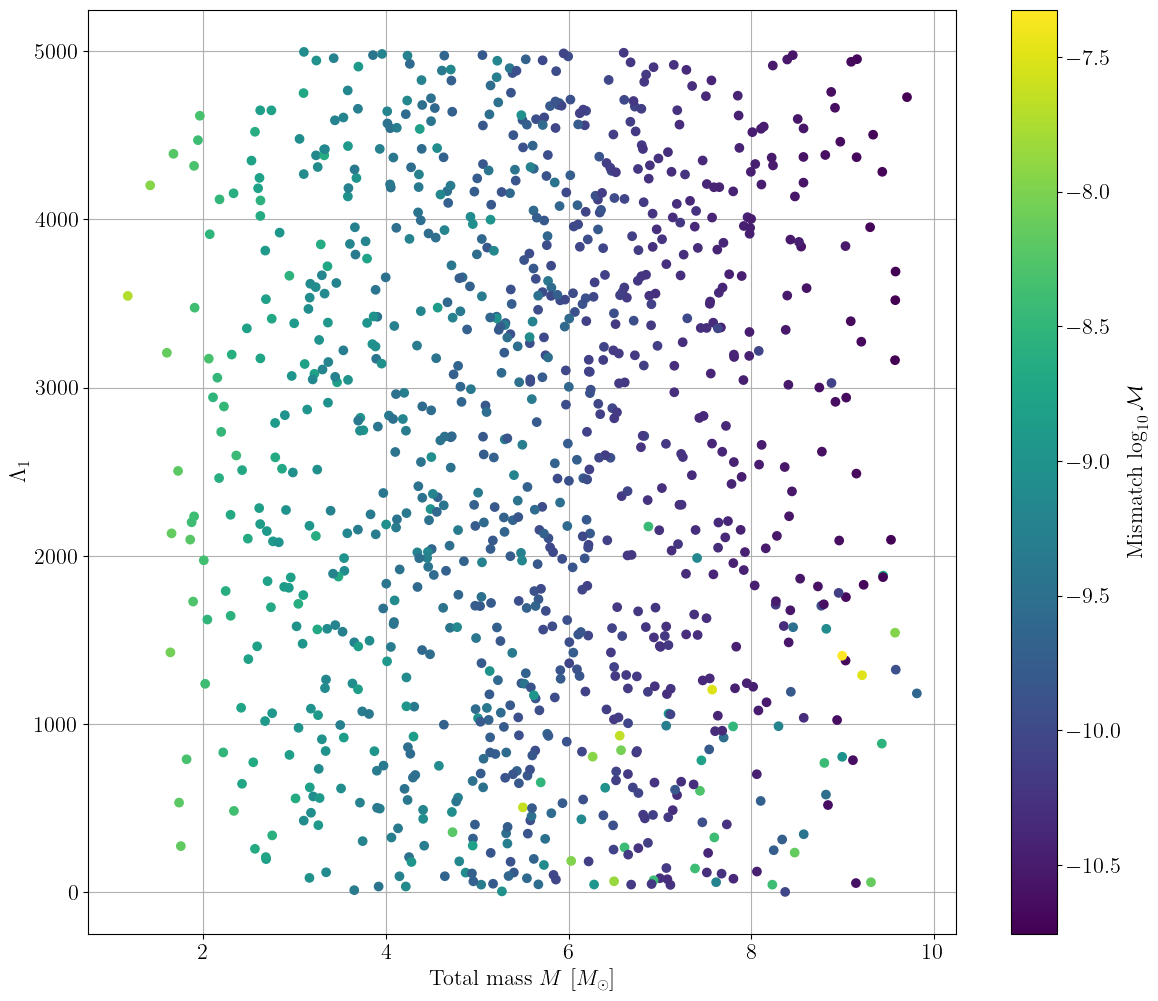

In [59]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(mass_values, lambda1_values, c = mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"$\Lambda_1$")
# plt.title(r"Unequal mass, non-spinning")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.savefig("../test/figures/matches_NRTidal.pdf", bbox_inches = 'tight')
# plt.savefig("../test/figures/matches_NRTidal.png", bbox_inches = 'tight')
plt.show()

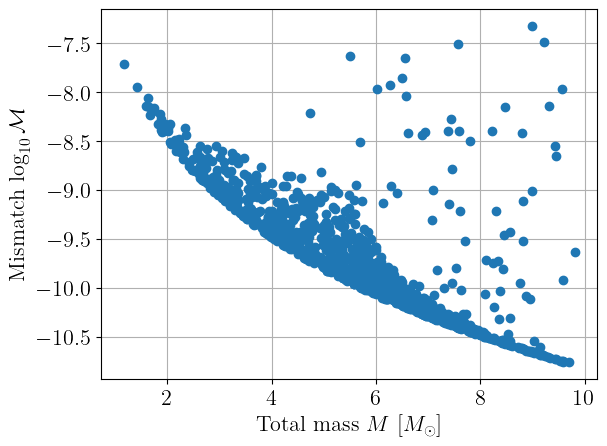

In [60]:
plt.scatter(mass_values, mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.title(r"Unequal mass, non-spinning")
# plt.savefig("../test/figures/matches_NRTidal_M_vs_mismatch.png", bbox_inches = 'tight')
plt.show()

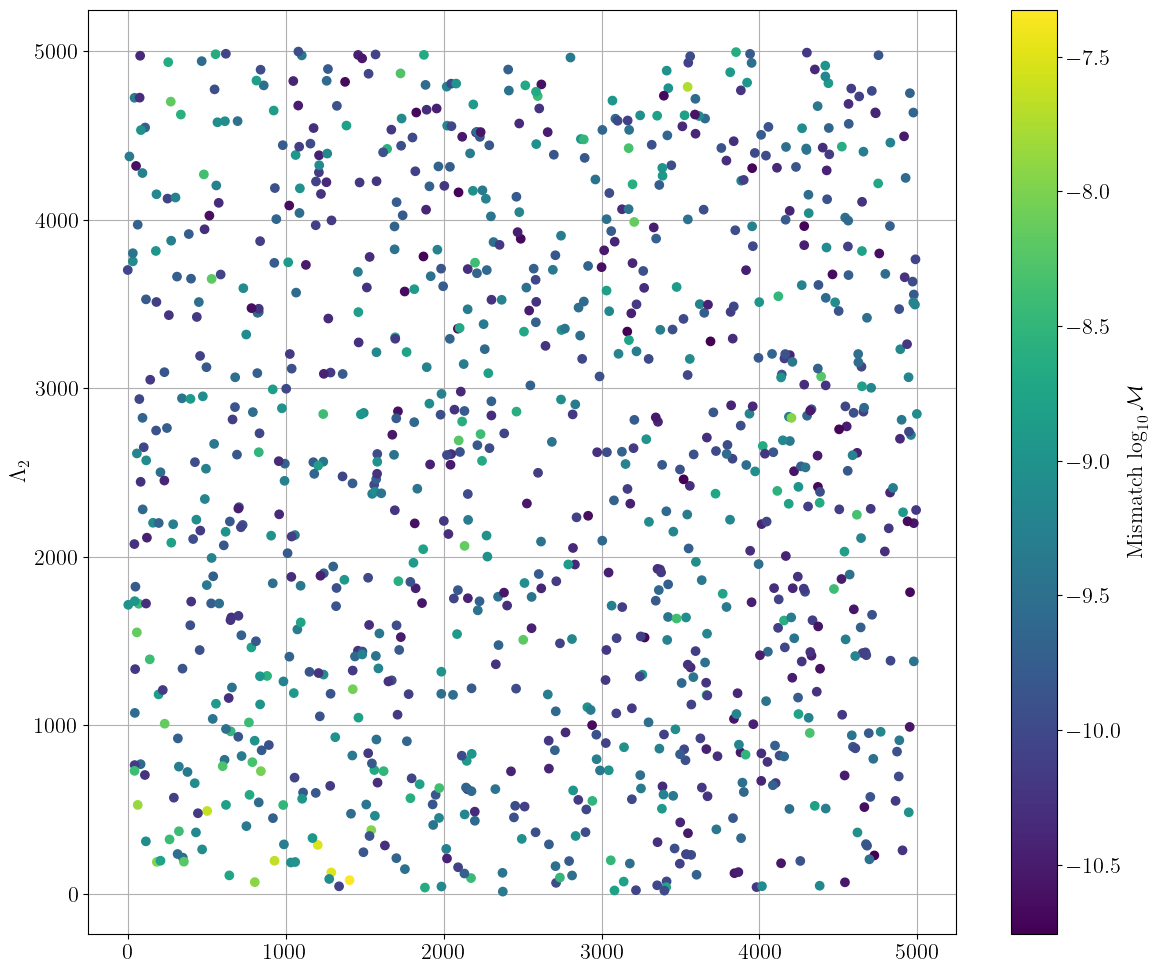

In [61]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(lambda1_values, lambda2_values, c = mismatch_values, zorder=100)
plt.ylabel(r"$\Lambda_2$")
plt.ylabel(r"$\Lambda_2$")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.savefig("../test/figures/matches_NRTidal_lambda1_lambda2.pdf", bbox_inches = 'tight')
# plt.savefig("../test/figures/matches_NRTidal_lambda1_lambda2.png", bbox_inches = 'tight')
plt.show()

## Check distributions of mismatches

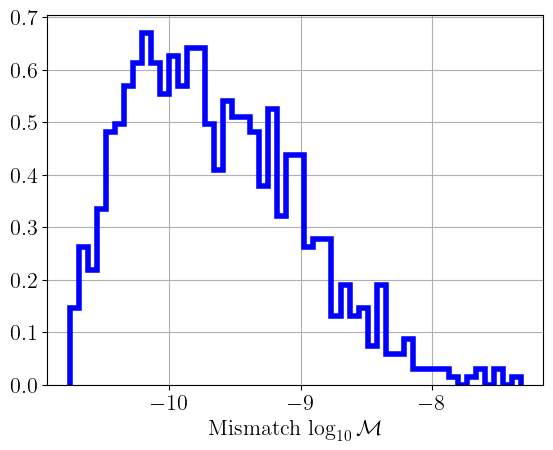

In [62]:
plt.hist(mismatch_values, color="blue", bins=50, histtype='step', linewidth=4, density=True)
plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

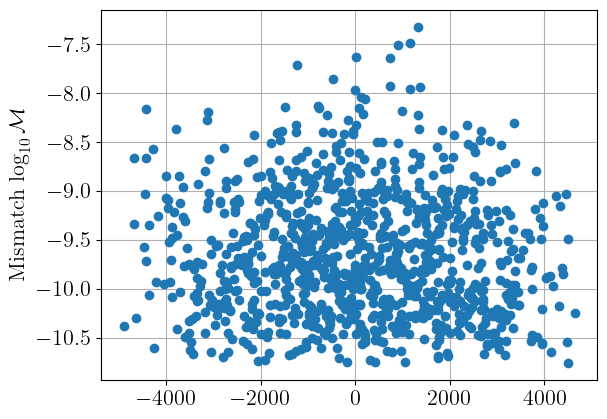

In [63]:
plt.scatter(lambda1_values - lambda2_values, mismatch_values, zorder=100)
# plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.title(r"Unequal mass, non-spinning")
# plt.savefig("../test/figures/matches_NRTidal_M_vs_mismatch.png", bbox_inches = 'tight')
plt.show()

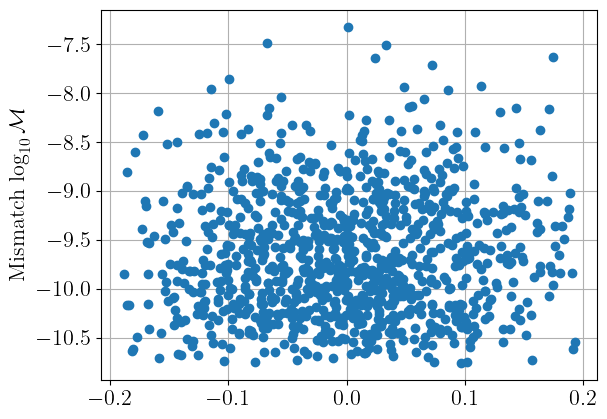

In [64]:
plt.scatter(chi1_values + chi2_values, mismatch_values, zorder=100)
# plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.title(r"Unequal mass, non-spinning")
# plt.savefig("../test/figures/matches_NRTidal_M_vs_mismatch.png", bbox_inches = 'tight')
plt.show()

In [65]:
min_match_row = matches_df[matches_df['match'] == matches_df['match'].min()]
min_match_row

,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,dist_mpc,tc,phi_ref,inclination,match,mismatch
209,209,4.629898,4.367621,0.087837,-0.086647,1405.370979,80.460733,770.910324,0.0,1.311524,0.69168,1.0,-7.325669
